<a href="https://colab.research.google.com/github/WrightlyRong/ASL-Recognition-with-MNIST-ASL-and-Augmented-ASL-Alphabet-Dataset/blob/master/ASL_Recognition_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Connect Google Drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import string
pd.options.mode.chained_assignment = None

data = pd.read_csv("/gdrive/MyDrive/sign_mnist_train.csv")

data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
Y = np.array(data['label'])
X = np.array(data.drop(columns='label'))

#X = X.reshape(X.shape[0] , 28,28, 1)
print(X.shape, Y.shape)

(27455, 784) (27455,)


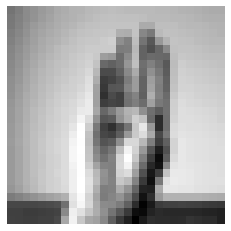

1


In [ ]:
import matplotlib.pyplot as plt
import random
r = random.randint(0,(21964-1))
def show_img():
  arr = np.array(X)
  some_value = arr[r]
  some_img = some_value.reshape(28,28)
  plt.imshow(some_img, cmap="gray")
  plt.axis("off")
  plt.show()  

show_img()
print(Y[r])


In [ ]:
import requests
import shutil

url = 'https://challengepost-s3-challengepost.netdna-ssl.com/photos/production/software_photos/001/028/905/datas/original.jpg'
file_name = 'signa.jpg'

res = requests.get(url, stream = True)

if res.status_code == 200:
    with open(file_name,'wb') as f:
        shutil.copyfileobj(res.raw, f)
    print('Image sucessfully Downloaded: ',file_name)
else:
    print('Image Couldn\'t be retrieved')

Image sucessfully Downloaded:  signa.jpg


In [ ]:
print(res)


<Response [200]>


In [ ]:
dummy_y = np.zeros( (27455, 24) )
print(dummy_y.shape)

for i in range(len(Y)):
  dummy_y[i][Y[i]-1]=1


(27455, 24)


In [ ]:
X_2 = pd.DataFrame(X).values.reshape(X.shape[0] ,28, 28, 1)
print(X_2.shape)

(27455, 28, 28, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_rem, Y_train, y_rem = train_test_split(X_2,dummy_y, train_size=0.6)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(Y_train.shape)
print(X_valid.shape), print(Y_valid.shape)
print(X_test.shape), print(Y_test.shape)

(16473, 28, 28, 1)
(16473, 24)
(5491, 28, 28, 1)
(5491, 24)
(5491, 28, 28, 1)
(5491, 24)


(None, None)

In [ ]:
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.
X_valid = X_valid.astype('float32')
X_valid = X_valid / 255.
print(X_valid[0])

[[[0.5647059 ]
  [0.5764706 ]
  [0.5882353 ]
  [0.6       ]
  [0.6117647 ]
  [0.62352943]
  [0.6313726 ]
  [0.63529414]
  [0.6431373 ]
  [0.6509804 ]
  [0.654902  ]
  [0.6627451 ]
  [0.6627451 ]
  [0.6666667 ]
  [0.6627451 ]
  [0.6627451 ]
  [0.6627451 ]
  [0.6627451 ]
  [0.6627451 ]
  [0.65882355]
  [0.6627451 ]
  [0.65882355]
  [0.654902  ]
  [0.654902  ]
  [0.6509804 ]
  [0.64705884]
  [0.6431373 ]
  [0.6392157 ]]

 [[0.5686275 ]
  [0.58431375]
  [0.6039216 ]
  [0.6117647 ]
  [0.61960787]
  [0.6313726 ]
  [0.63529414]
  [0.6431373 ]
  [0.6509804 ]
  [0.65882355]
  [0.6666667 ]
  [0.6745098 ]
  [0.67058825]
  [0.67058825]
  [0.6666667 ]
  [0.6666667 ]
  [0.6784314 ]
  [0.67058825]
  [0.67058825]
  [0.6666667 ]
  [0.6666667 ]
  [0.67058825]
  [0.6666667 ]
  [0.65882355]
  [0.65882355]
  [0.654902  ]
  [0.6509804 ]
  [0.64705884]]

 [[0.5764706 ]
  [0.6       ]
  [0.6117647 ]
  [0.61960787]
  [0.627451  ]
  [0.6313726 ]
  [0.6431373 ]
  [0.64705884]
  [0.65882355]
  [0.6745098 ]
  [0.6

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses, optimizers
from tensorflow.keras.utils import to_categorical

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.30))
model.add(layers.Dense(24, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
batch_size = 256
epochs = 30
num_classes = 24

In [ ]:
model.compile(loss=losses.categorical_crossentropy, optimizer=optimizers.Adam(),metrics=['accuracy'])

In [ ]:
training_history = model.fit(X_train, Y_train,
                             batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(X_valid, Y_valid))

Epoch 1/30
65/65 [==============================] - 17s 242ms/step - loss: 3.0565 - accuracy: 0.0941 - val_loss: 2.6178 - val_accuracy: 0.2710
Epoch 2/30
65/65 [==============================] - 16s 239ms/step - loss: 2.1869 - accuracy: 0.3038 - val_loss: 1.4661 - val_accuracy: 0.5948
Epoch 3/30
65/65 [==============================] - 15s 238ms/step - loss: 1.4563 - accuracy: 0.5153 - val_loss: 0.9276 - val_accuracy: 0.7314
Epoch 4/30
65/65 [==============================] - 15s 238ms/step - loss: 1.0706 - accuracy: 0.6361 - val_loss: 0.5644 - val_accuracy: 0.8481
Epoch 5/30
65/65 [==============================] - 16s 240ms/step - loss: 0.8155 - accuracy: 0.7169 - val_loss: 0.4107 - val_accuracy: 0.9040
Epoch 6/30
65/65 [==============================] - 15s 238ms/step - loss: 0.6602 - accuracy: 0.7707 - val_loss: 0.2985 - val_accuracy: 0.9313
Epoch 7/30
65/65 [==============================] - 16s 239ms/step - loss: 0.5382 - accuracy: 0.8129 - val_loss: 0.2172 - val_accuracy: 0.9536

In [ ]:
test_eval = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.0026493999175727367
Test accuracy: 0.9998179078102112


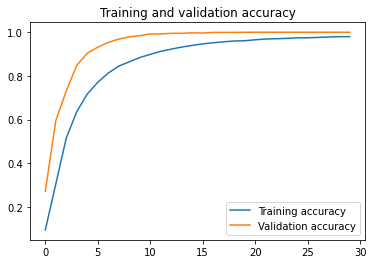

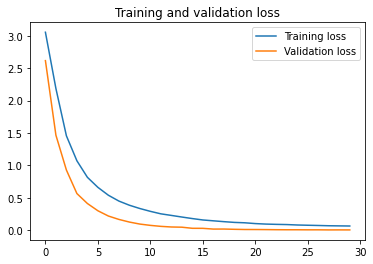

In [ ]:
accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']
epoch = range(len(accuracy))
plt.plot(epoch, accuracy, label='Training accuracy')
plt.plot(epoch, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epoch, loss, label='Training loss')
plt.plot(epoch, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes = model.predict(X_test)

In [ ]:
print(predicted_classes[0])
print(np.argmax(np.round(predicted_classes[0])))

[5.7689071e-24 1.1363326e-18 1.3527664e-13 5.0305284e-21 1.2329136e-13
 1.2759480e-17 3.6516026e-11 5.7241052e-11 1.3734004e-18 6.2565071e-11
 7.2471523e-10 3.2369268e-17 2.4574855e-09 1.5017886e-14 2.5291769e-09
 8.3612469e-15 1.3945470e-14 3.2189834e-11 1.8411297e-13 2.8417322e-24
 3.3399631e-14 2.6180654e-17 2.6913123e-14 1.0000000e+00]
23


In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape

(5491,)

In [ ]:
predicted_classes

array([23, 21, 16, ...,  4,  5, 20])

In [ ]:
Y_test2 = np.argmax(np.round(Y_test),axis=1)

correct labels - 5490


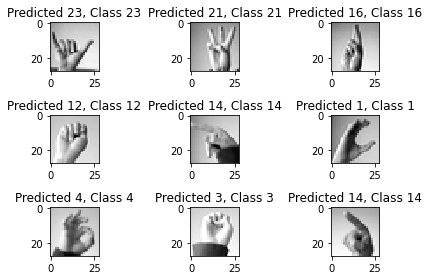

In [ ]:
correct = np.where(predicted_classes==Y_test2)[0]
print(f'correct labels - {len(correct)}')
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test2[correct]))
    plt.tight_layout()

Misclassified labels - 1


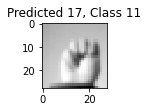

In [ ]:
correct = np.where(predicted_classes==Y_test2)[0]
print(f'Misclassified labels - {(Y_test2.shape[0]) - len(correct)}')
cnt = 0
for i in range (0,len(Y_test2)):
  if(predicted_classes[i]!=Y_test2[i]):
    
    plt.subplot(3,3,cnt+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i], Y_test2[i]))
    plt.tight_layout()
    cnt+=1
    if(cnt==9):
      break

In [ ]:
!pip install gradio

     |████████████████████████████████| 5.2 MB 4.5 MB/s 
     |████████████████████████████████| 1.1 MB 46.5 MB/s 
     |████████████████████████████████| 2.0 MB 32.9 MB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 212 kB 47.2 MB/s 
     |████████████████████████████████| 253 kB 47.5 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 144 kB 36.1 MB/s 
     |████████████████████████████████| 271 kB 58.5 MB/s 
     |████████████████████████████████| 94 kB 3.0 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 10.9 MB 30.1 MB/s 
     |████████████████████████████████| 80 kB 8.0 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 62 kB 755 kB/s 
     |████████████████████████████████| 4.0 MB 37.1 MB/s 
     |████████████████████████

In [ ]:
import gradio as gr

In [ ]:
labels = ("A", "B", "C", "D", "E",
          "F", "G", "H", "I", "J",
          "L", "M", "N", "O", "P",
          "Q", "R", "S", "T", "U",
          "V", "W", "X", "Y")

In [ ]:
labels_2 = ("0", "1", "2", "3", "4",
          "5", "6", "7", "8", "10",
          "11", "12", "13", "14", "15",
          "16", "17", "18", "19", "20",
          "21", "22", "23", "24")

In [ ]:
from PIL import Image

In [ ]:
!gdown --id 1QwuBDmPWqLKrBn8cikNFYHmta-11vxIi
!gdown --id 1tU9gHoYJZqRCQA6uoQHosy4iOyyyXxUx
!gdown --id 1XX1wg1vjnCeWuxJkVBoKELaqGQJxJnH-
!gdown --id 10YM8Qm9XsR9os7aFPK2LGAOkPu26DTrs

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1QwuBDmPWqLKrBn8cikNFYHmta-11vxIi
To: /content/MLimageA.jpg
100% 146k/146k [00:00<00:00, 73.5MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1tU9gHoYJZqRCQA6uoQHosy4iOyyyXxUx
To: /content/MLimageV.jpg
100% 2.99k/2.99k [00:00<00:00, 4.84MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: htt

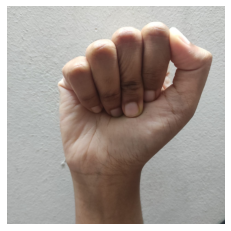

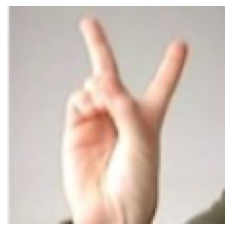

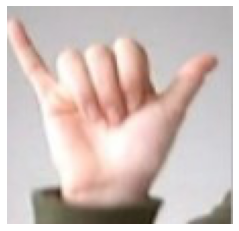

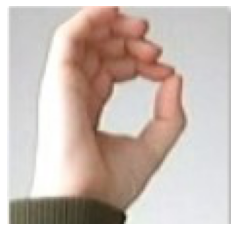

In [ ]:
img = Image.open("MLimageA.jpg")
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

img2 = Image.open("MLimageV.jpg")
plt.imshow(img2, cmap="gray")
plt.axis("off")
plt.show()

img3 = Image.open("MLimageY.jpg")
plt.imshow(img3, cmap="gray")
plt.axis("off")
plt.show()

img4 = Image.open("MLimageO.jpg")
plt.imshow(img4, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
img = img.convert('L')
im_resized = img.resize((28,28), Image.ANTIALIAS)

In [ ]:
dummy_img = np.array(im_resized)
dummy_img = dummy_img.reshape(-1,28,28,1)
predict_dummy_image = model.predict(dummy_img)
print(np.argmax(np.round(predict_dummy_image)))

13


In [ ]:
def classify_image(inp):
    inp = Image.fromarray(inp)
    inp = inp.convert('L')
    inp = inp.resize((28,28), Image.ANTIALIAS)
    inp = np.array(inp)
    inp = inp.reshape(-1, 28, 28, 1)
    #inp = tf.keras.applications.mobilenet_v2.preprocess_input(inp)
    inp = inp.astype('float32')
    inp = inp / 255.
    classes = new_model.predict(inp)
    #return classes
    #return(inp.shape)
    return np.argmax(np.round(classes))
   # prediction = model.predict(inp).flatten()
    #return {labels_2[i]: float(prediction[i]) for i in range(1000)}

In [ ]:
image = gr.inputs.Image(shape=(28, 28))
label = gr.outputs.Label(num_top_classes=1)

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [ ]:
!mkdir -p saved_model
model.save('saved_model/mnist_model')

INFO:tensorflow:Assets written to: saved_model/mnist_model/assets


In [ ]:
new_model = tf.keras.models.load_model('saved_model/mnist_model')

In [ ]:
iface = gr.Interface(fn=classify_image, inputs = image, outputs = "text", capture_session=True)
iface.launch(debug=True)

/usr/local/lib/python3.7/dist-packages/gradio/interface.py:248: UserWarning: The `capture_session` parameter in the `Interface` is deprecated and may be removed in the future.
  "The `capture_session` parameter in the `Interface`"


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://35246.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<fastapi.applications.FastAPI at 0x7fa11c0add50>,
 'http://127.0.0.1:7860/',
 'https://35246.gradio.app')